In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FT01_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()
df

,Vazao01
Time,
2018-01-01,164.09
2018-01-02,213.96
2018-01-03,256.33
2018-01-04,232.93
2018-01-05,257.22
...,...
2019-12-27,227.66
2019-12-28,264.96
2019-12-29,209.38


<AxesSubplot:xlabel='Time'>

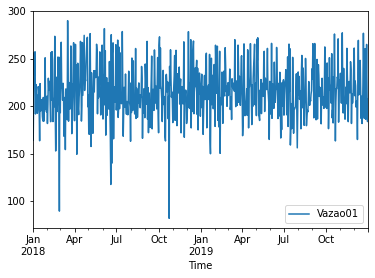

In [24]:
df.plot()

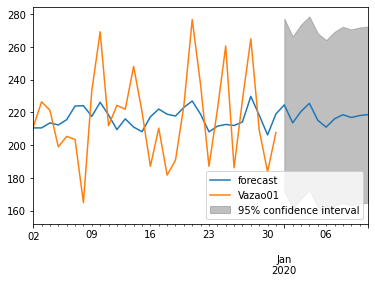

In [31]:
model = ARIMA(df['Vazao01'], order=(7,1,1),freq='D')
model_fit = model.fit()
model_fit.plot_predict(700,df['Vazao01'].count()+10,dynamic=False)
plt.show()
fc, se, conf = model_fit.forecast(steps=7, alpha=0.05)
fc_vendas_dia = pd.Series(fc, name='vendas_dia')

In [23]:
MSE = (model_fit.resid**2).mean()
MSE

752.7495551445126